# **IPPR Expt 4: Edge Detection**

Name: Shwetha Iyer

Batch: A4

PRN: 1032211195

Performed on: 15/2/24

Submitted on: 18/2/24

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

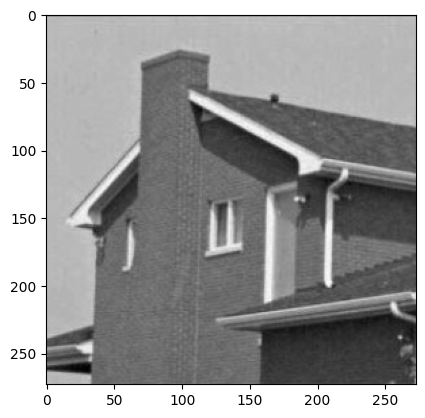

In [56]:
image = cv2.imread('house1.jpg',0)
plt.imshow(image, cmap='gray')

# ***Sobel Operator***

In [43]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobelxy = abs(sobelx) + abs(sobely)
#sobelz = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)

Text(0.5, 1.0, 'Combined Edges (|Gx| + |Gy|)')

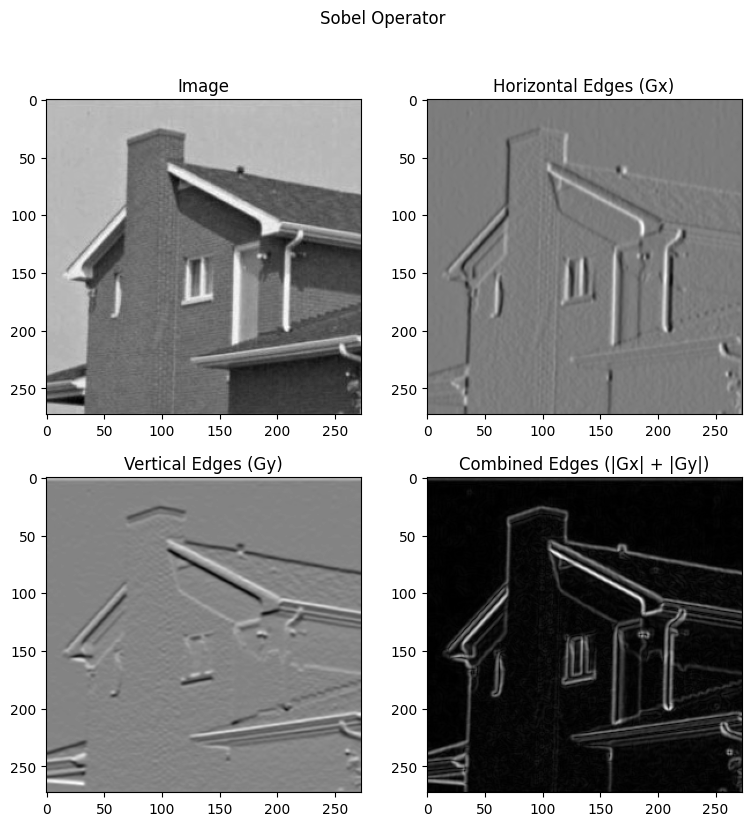

In [44]:
f,ax = plt.subplots(2,2, figsize=(9,9))
f.suptitle("Sobel Operator")
ax[0][0].imshow(image,cmap='gray')
ax[0][0].set_title("Image")

ax[0][1].imshow(sobelx,cmap='gray')
ax[0][1].set_title("Horizontal Edges (Gx)")

ax[1][0].imshow(sobely,cmap='gray')
ax[1][0].set_title("Vertical Edges (Gy)")

ax[1][1].imshow(sobelxy,cmap='gray')
ax[1][1].set_title("Combined Edges (|Gx| + |Gy|)")

# ***Prewitt Operator***

In [45]:
prewittx = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitty = cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
#prewittz = cv2.filter2D(image, -1, np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]]))
prewittxy = abs(prewittx) + abs(prewitty)

We can observe that Prewitt generates more noise than Sobel, due to uniform coefficient values.

Text(0.5, 1.0, 'Combined Edges (|Gx| + |Gy|)')

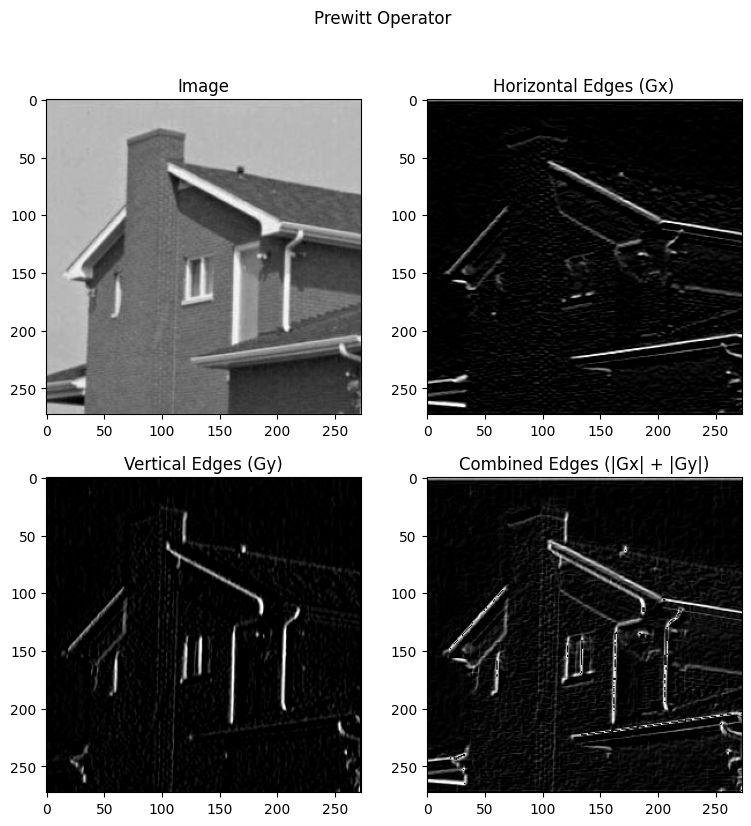

In [46]:
f,ax = plt.subplots(2,2, figsize=(9,9))
f.suptitle("Prewitt Operator")
ax[0][0].imshow(image,cmap='gray')
ax[0][0].set_title("Image")

ax[0][1].imshow(prewittx,cmap='gray')
ax[0][1].set_title("Horizontal Edges (Gx)")

ax[1][0].imshow(prewitty,cmap='gray')
ax[1][0].set_title("Vertical Edges (Gy)")

ax[1][1].imshow(prewittxy,cmap='gray')
ax[1][1].set_title("Combined Edges (|Gx| + |Gy|)")

# ***Robert Operator***

In [47]:
robertx = cv2.filter2D(image, -1, np.array([[1, 0],[0, -1]]))
roberty = cv2.filter2D(image, -1, np.array([[0, 1],[-1, 0]]))
robertxy = abs(robertx) + abs(roberty)

Text(0.5, 1.0, 'Combined Edges (|Gx| + |Gy|)')

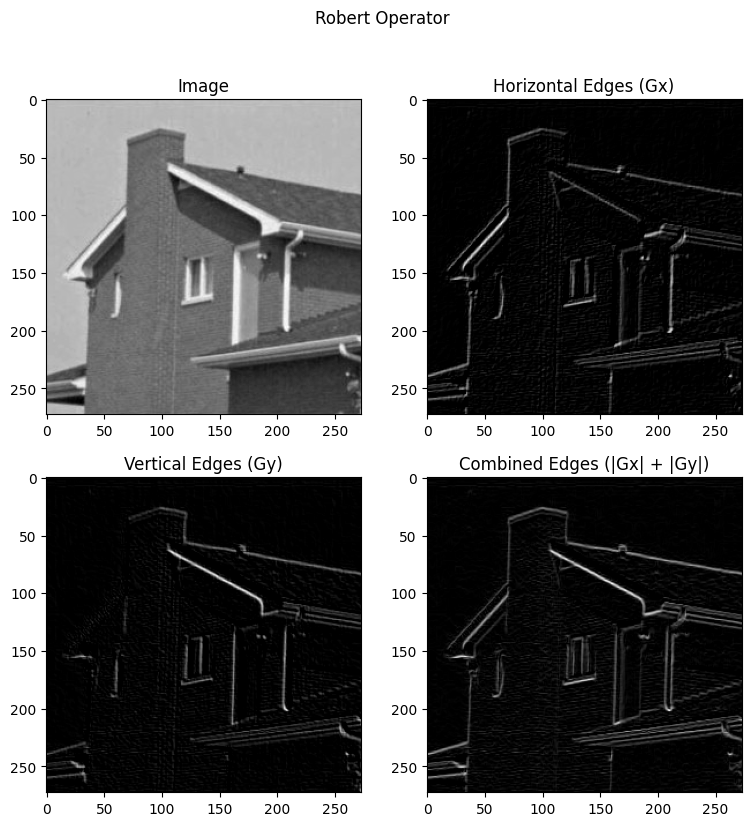

In [48]:
f,ax = plt.subplots(2,2, figsize=(9,9))
f.suptitle("Robert Operator")
ax[0][0].imshow(image,cmap='gray')
ax[0][0].set_title("Image")

ax[0][1].imshow(robertx,cmap='gray')
ax[0][1].set_title("Horizontal Edges (Gx)")

ax[1][0].imshow(roberty,cmap='gray')
ax[1][0].set_title("Vertical Edges (Gy)")

ax[1][1].imshow(robertxy,cmap='gray')
ax[1][1].set_title("Combined Edges (|Gx| + |Gy|)")

# ***Canny Edge Detection***

Text(0.5, 1.0, 'Canny Edges')

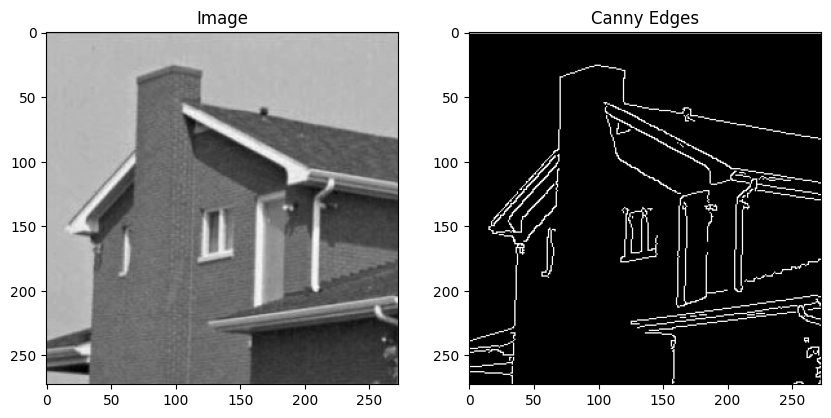

In [49]:
f,ax = plt.subplots(1,2, figsize=(10,10))

edges = cv2.Canny(image,100,200)
ax[0].imshow(image,cmap = 'gray')
ax[0].set_title("Image")

ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title("Canny Edges")

# ***Laplacian Operator***

Text(0.5, 1.0, 'Laplacian Edges')

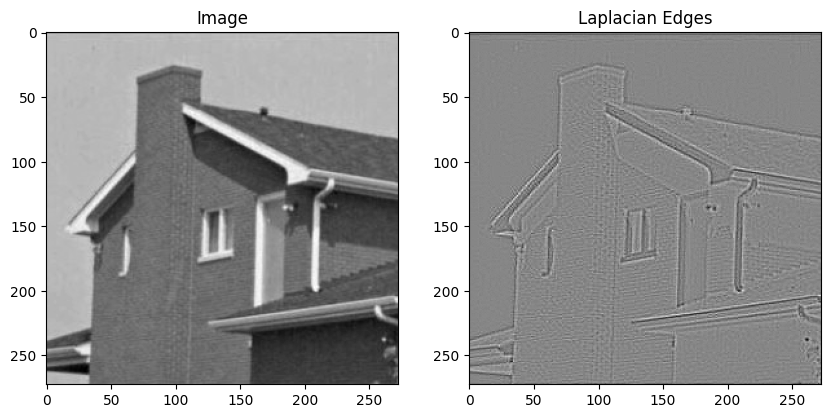

In [50]:
f,ax = plt.subplots(1,2, figsize=(10,10))

edges = cv2.Laplacian(image,cv2.CV_64F)
ax[0].imshow(image,cmap = 'gray')
ax[0].set_title("Image")

ax[1].imshow(edges,cmap = 'gray')
ax[1].set_title("Laplacian Edges")

# ***Contour Detection***

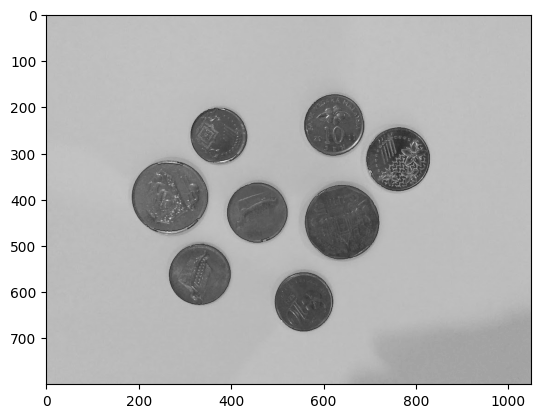

In [51]:
image = cv2.imread('coins-contour.jpg',0)
plt.imshow(image, cmap='gray')

Text(0.5, 1.0, 'Detected Contours')

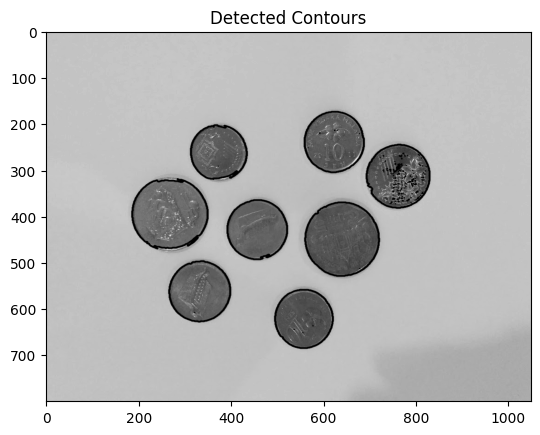

In [52]:
img = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)[1]
contours, hierarchy = cv2.findContours(img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
img1 = image.copy()
cv2.drawContours(img1, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(img1, cmap='gray')
plt.title("Detected Contours")

# ***Hough Line Transform***

Text(0.5, 1.0, 'Detected Lines')

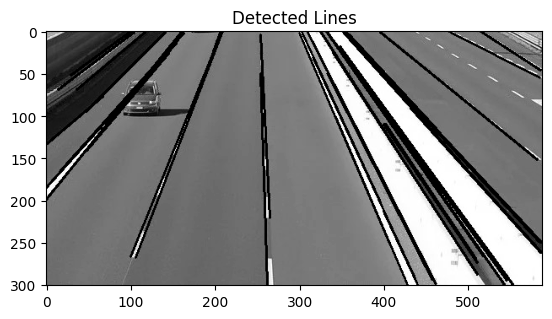

In [53]:
image = cv2.imread('/content/87296lane_hough.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image,100,200,apertureSize=3)

lines_list = []
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=65, minLineLength=10, maxLineGap=50)

for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    lines_list.append([(x1,y1),(x2,y2)])

plt.imshow(image, cmap='gray')
plt.title("Detected Lines")

# ***Results and Conclusion***

In this experiment, we explored various edge detection techniques in the spatial domain, including Gradient-based operators: Sobel, Prewitt, Robert, and Gaussian operators: LoG and Canny.

We observed that Sobel and Prewitt operators were effective for horizontal and vertical edges, Sobel being less susceptible to noise. Robert operator detected diagonal edges well. Laplacian proved good for sharp edges, but may be prone to noise and false edges. Canny edge detector offered good localization, noise reduction and single edge response, making it a popular choice.

The experiment highlighted the applications of edge detection in medical imaging, satellite images, and facial recognition. We also implemented algorithms like Contour detection, Canny edge detection and Hough Line Transform for edge detection and boundary representation.

# ***Post-Lab Questions***

**Q1. Apply the Sobel edge detector and Laplacian edge detector on the highlighted area and comment on the result.**

In [54]:
from scipy.signal import convolve2d
I = np.array([[12, 12, 12, 12, 12],
              [12, 12, 12, 12, 12],
              [201, 201, 201, 201, 201],
              [201, 201, 201, 201, 201]], dtype=np.uint8)

sobelx = convolve2d(I, np.array([[1, 2, 1],[0, 0, 0],[-1,-2,-1]]), mode='valid')
sobely = convolve2d(I, np.array([[1, 0, 1],[2, 0, -1],[1, 0, 1]]), mode='valid')
sobelxy = abs(sobelx) + abs(sobely)

laplacian_edges = convolve2d(I, np.array([[0,-1,0],[-1, 4,-1],[0,-1,0]]), mode='valid')

print("Sobel Edges:")
print(sobelxy)

print("\nLaplacian Edges:")
print(laplacian_edges)

Sobel Edges:
[[1194 1194 1194]
 [1383 1383 1383]]

Laplacian Edges:
[[-189 -189 -189]
 [ 189  189  189]]


Comments on the Result:
- Sobel edges tend to produce stronger responses, whereas Laplacian edges are more sensitive to subtle changes in intensity.
- Sobel edges are derived from 1st derivative, so they provide directional information about edges
- Laplacian edges are derived from 2nd derivative, so they highlight regions of rapid intensity change regardless of direction.
- Laplacian edges have lower magnitudes compared to Sobel edges.
